# Capstone 3: Bank Marketing Campaign Prediction

## 1. Business Understanding

### 1.1 Background
Sebuah bank di Indonesia ingin meningkatkan efisiensi telemarketing produk term deposit mereka. Saat ini, mereka menghubungi seluruh nasabah tanpa mempertimbangkan apakah nasabah tersebut akan membuka deposito atau tidak, yang menyebabkan pemborosan biaya dan waktu.

Dengan menggunakan data yang ada, kita akan memprediksi nasabah mana yang lebih mungkin membuka deposito agar bisa mengoptimalkan strategi marketing dan telemarketing.

### 1.2 Problem Statement
Bagaimana memprediksi apakah seorang nasabah akan membuka term deposit setelah dihubungi oleh marketing?

### 1.3 Objective
* Membangun model klasifikasi untuk memprediksi peluang nasabah membuka deposito.
* Meningkatkan efisiensi marketing dengan menargetkan nasabah yang lebih akurat.
* Memberikan rekomendasi kepada tim marketing mengenai nasabah yang lebih potensial.

### 1.4 Business Impact
* Mengurangi cost marketing
* Meningkatkan Konversi Campaign
* Mempermudah tim marketing memilih target yang. potensial

## 2. Data Understanding

### 2.1 Data Overview

Sebelum kita melangkah lebih jauh, penting untuk memahami struktur data yang kita miliki.
Di tahap ini, kita akan memeriksa informasi umum tentang dataset kita, termasuk jumlah baris dan kolom, tipe data, serta jumlah nilai yang hilang.

In [5]:
import pandas as pd
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.info()  
df.describe()  
df.isnull().sum()  
df.duplicated().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


np.int64(8)

In [6]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


**Data Overview**

Setelah memuat dataset, berikut adalah informasi tentang struktur data yang ada:

- **Jumlah data (entries):**  
  Dataset ini memiliki **7813 entri**, dengan indeks yang dimulai dari 0 hingga 7812.

- **Kolom dan Tipe Data:**
  Dataset memiliki **11 kolom** dengan tipe data sebagai berikut:
  - **4 kolom numerik** (`int64`):
    - `age`: Umur nasabah.
    - `balance`: Saldo rata-rata nasabah di rekening bank.
    - `campaign`: Jumlah kontak yang dilakukan oleh tim marketing selama kampanye.
    - `pdays`: Jumlah hari sejak terakhir kali nasabah dihubungi.
  - **7 kolom kategorikal** (`object`):
    - `job`: Pekerjaan nasabah (misalnya, admin, technician, etc.).
    - `housing`: Status kepemilikan rumah nasabah (yes/no).
    - `loan`: Apakah nasabah memiliki pinjaman pribadi (yes/no).
    - `contact`: Metode kontak yang digunakan untuk menghubungi nasabah (misalnya, cellular, telephone).
    - `month`: Bulan terakhir nasabah dihubungi.
    - `poutcome`: Hasil dari kampanye sebelumnya (success, failure, etc.).
    - `deposit`: Status apakah nasabah membuka deposito setelah dihubungi (yes/no) - **target variable**.

- **Tidak ada missing values:**  
  Semua kolom memiliki **7813 data yang tidak kosong**.

### 2.2 Cek Distribusi Target

deposit
no     4081
yes    3732
Name: count, dtype: int64


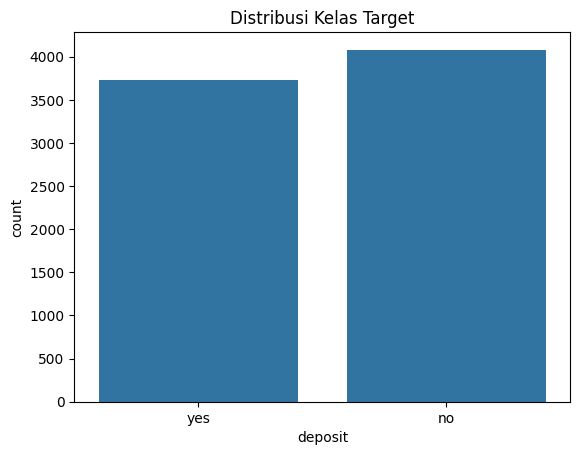

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

deposit_counts = df['deposit'].value_counts()
print(deposit_counts)

sns.countplot(x='deposit', data=df)
plt.title('Distribusi Kelas Target')
plt.show()

**Distribusi Kelas Target:**
Berdasarkan grafik dan jumlah yang ditampilkan, kita melihat bahwa distribusi target (deposit) hampir seimbang antara dua kelas:
* Jumlah no (tidak membuka deposito): 4081 nasabah.
* Jumlah yes (membuka deposito): 3732 nasabah.

Dengan data yang seimbang seperti ini, kita dapat melanjutkan dengan model klasifikasi tanpa perlu khawatir tentang class imbalance, tetapi kita tetap perlu memeriksa apakah model lebih sering memprediksi satu kelas lebih dominan daripada kelas lainnya.

Berikutnya, kita akan melakukan proses seleksi fitur dan data preparation untuk memastikan kita memiliki data yang bersih dan siap digunakan dalam pelatihan model.

### 2.3 Cohort Analysis
Salah satu analisis yang berguna untuk memahami tren atau pola dalam data adalah cohort analysis.
Dalam konteks ini, kita akan melihat distribusi nasabah yang membuka deposito berdasarkan bulan. Hal ini membantu untuk mengetahui apakah ada bulan-bulan tertentu yang lebih efektif dalam menggaet nasabah baru.

deposit    no  yes
month             
apr       247  415
aug       589  496
dec         8   60
feb       233  301
jan       128   99
jul       621  429
jun       472  385
mar        22  177
may      1317  659
nov       367  290
oct        43  243
sep        34  178


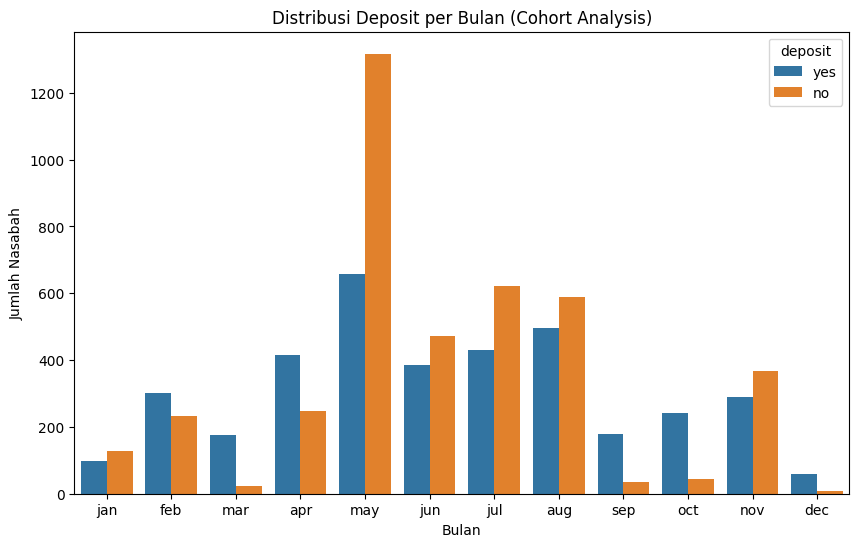

In [8]:
# Cohort Analysis: Distribusi berdasarkan bulan dan target 'deposit'
cohort_counts = df.groupby(['month', 'deposit']).size().unstack(fill_value=0)

# Menampilkan hasil tabel
print(cohort_counts)

# Visualisasi distribusi per bulan dan target depossit
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Distribusi Deposit per Bulan (Cohort Analysis)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Nasabah')
plt.show()

* Berdasarkan grafik dan tabel yang dihasilkan, dapat disimpulkan bahwa meskipun ada bulan dengan lonjakan nasabah yang membuka deposito (seperti bulan Mei), pada umumnya minat nasabah terhadap deposito tidak terlalu tinggi dibandingkan dengan jumlah nasabah yang tidak tertarik (kelas target “no”).
* Selanjutnya, analisis lebih lanjut bisa dilakukan untuk mencari tahu faktor apa saja yang mendorong nasabah untuk membuka deposito, terutama pada bulan-bulan dengan konversi tinggi, seperti Mei.

### 2.4. Univariate Analysis (Analisis Satu Fitur)
Selanjutnya, kita akan menganalisis distribusi dari masing-masing fitur numerik dalam dataset ini.
Dengan menggunakan visualisasi histogram dan boxplot, kita bisa mendapatkan gambaran tentang sebaran nilai dan kemungkinan adanya outlier pada fitur numerik.

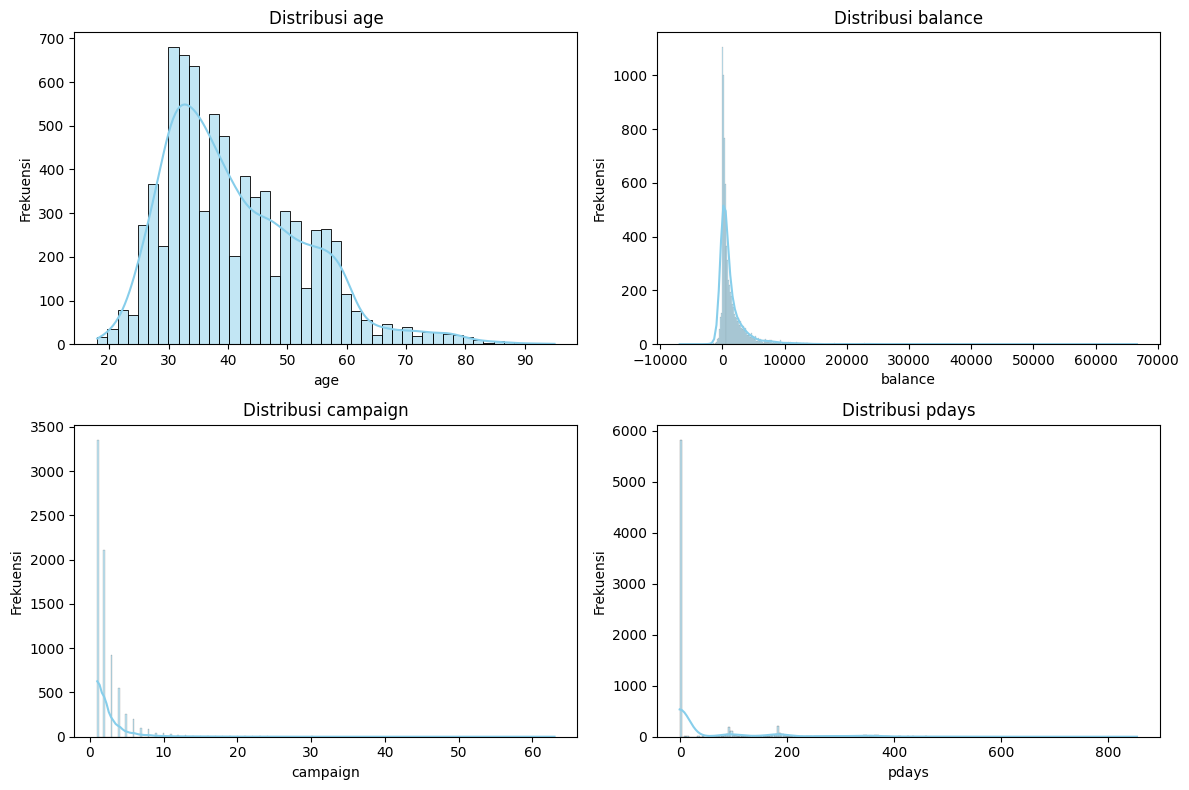

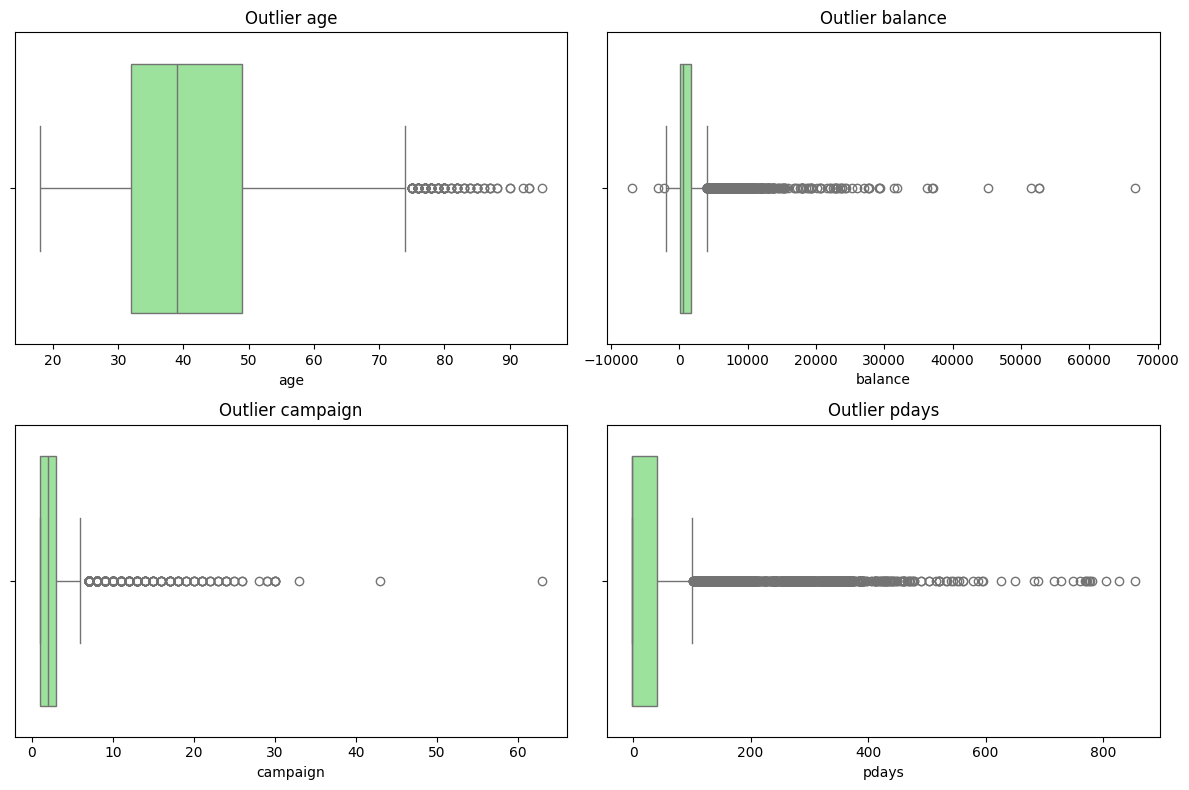

In [9]:
# Univariate Analysis - Visualisasi histogram untuk fitur numerik
num_cols = ['age', 'balance', 'campaign', 'pdays']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Boxplot untuk melihat outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Outlier {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

**Interpretasi:**
1. **Distribusi Umur (Age)**:
   - Berdasarkan histogram, terlihat bahwa mayoritas data terkonsentrasi pada rentang usia 30-40 tahun, yang menunjukkan bahwa sebagian besar nasabah berusia antara 30 hingga 40 tahun.
   - Beberapa individu memiliki usia yang lebih tua, meskipun jumlahnya sedikit. Hal ini juga terlihat pada boxplot, di mana ada beberapa **outliers** di sisi kanan. 
   - Outliers ini mengindikasikan bahwa ada individu dengan usia yang sangat tinggi yang mungkin perlu dianalisis lebih lanjut untuk validitasnya.

2. **Distribusi Saldo (Balance)**:
   - Histogram menunjukkan bahwa sebagian besar individu memiliki saldo rendah, dengan puncak yang terlihat di dekat nol. Hal ini menunjukkan banyak nasabah yang memiliki saldo rendah dalam data ini.
   - Boxplot menunjukkan adanya **outliers** di sisi kanan yang sangat jauh, yang mungkin mencerminkan individu dengan saldo yang sangat tinggi. 
   - Perlu dilakukan analisis lebih lanjut terhadap nilai saldo tinggi ini, apakah merupakan kesalahan data atau memang valid.

3. **Distribusi Jumlah Kontak Kampanye Terakhir (Campaign)**:
   - Distribusi histogram menunjukkan bahwa sebagian besar nasabah hanya dihubungi sedikit kali (jumlah kontak kurang dari 10), namun ada sejumlah kecil nasabah yang dihubungi lebih sering.
   - Boxplot menunjukkan **outliers** pada sisi kanan, yang mengindikasikan adanya beberapa nasabah yang sangat terlibat dalam kampanye dibandingkan dengan mayoritas lainnya.

4. **Distribusi Hari Sejak Kontak Terakhir (Pdays)**:
   - Histogram menunjukkan bahwa sebagian besar nasabah memiliki nilai **pdays** -1, yang menandakan bahwa mereka belum pernah dihubungi sebelumnya. Namun, ada sejumlah kecil nasabah yang dihubungi beberapa hari setelah kontak terakhir.
   - Boxplot menunjukkan banyak **outliers** di sisi kanan, yang menunjukkan adanya beberapa individu yang memiliki hari sejak kontak terakhir yang sangat besar.
   - Ini mengindikasikan bahwa sebagian kecil nasabah mungkin baru dihubungi dalam rentang waktu yang sangat panjang.

**Kesimpulan**:
- Banyak fitur memiliki **outliers** yang perlu diperiksa lebih lanjut karena dapat mempengaruhi model dan analisis lebih lanjut.
- Distribusi data menunjukkan adanya ketidakseimbangan, seperti banyak nasabah dengan saldo rendah dan banyak yang belum pernah dihubungi, yang harus diperhatikan dalam analisis dan pemodelan.
- Beberapa fitur, seperti **balance** dan **pdays**, memiliki distribusi yang miring. Untuk fitur-fitur ini, ini bisa dipertimbangkan untuk melakukan transformasi untuk memperbaiki distribusi data agar lebih normal dan cocok untuk pemodelan.
- Penghapusan atau penanganan **outliers** juga diperlukan untuk memastikan model tidak terpengaruh oleh nilai ekstrem yang tidak representatif.

Langkah selanjutnya adalah memutuskan apakah **outliers** akan dihapus atau dipertahankan, dan melakukan transformasi data untuk fitur-fitur yang terdistribusi miring agar model dapat memproses data dengan lebih baik.

### 2.5. Bivariate Analysis (Analisis Dua Fitur)
Untuk lebih memahami hubungan antara fitur dan target, kita akan melakukan bivariate analysis.
Di sini, kita akan melihat hubungan antara beberapa fitur dan target deposit (nasabah yang membuka deposito), baik dengan menggunakan visualisasi boxplot maupun countplot.

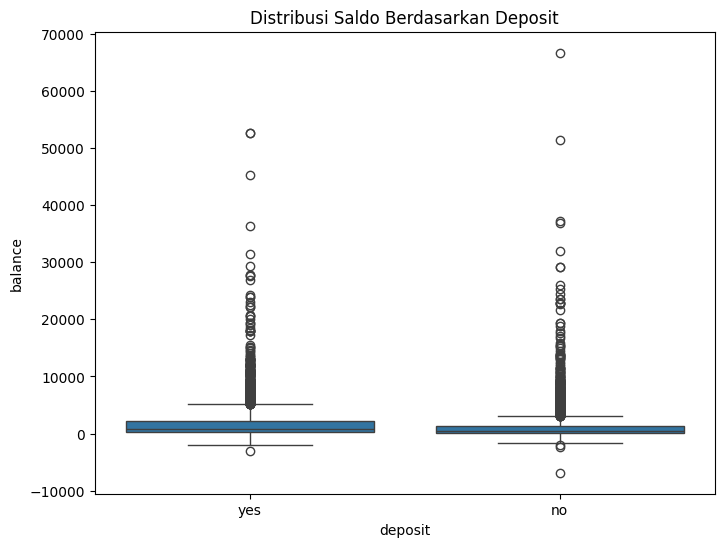

          count         mean          std     min    25%    50%      75%  \
deposit                                                                    
no       4081.0  1238.946582  2895.011315 -6847.0   64.0  410.0  1296.00   
yes      3732.0  1811.527331  3262.878530 -3058.0  215.0  752.0  2172.75   

             max  
deposit           
no       66653.0  
yes      52587.0  


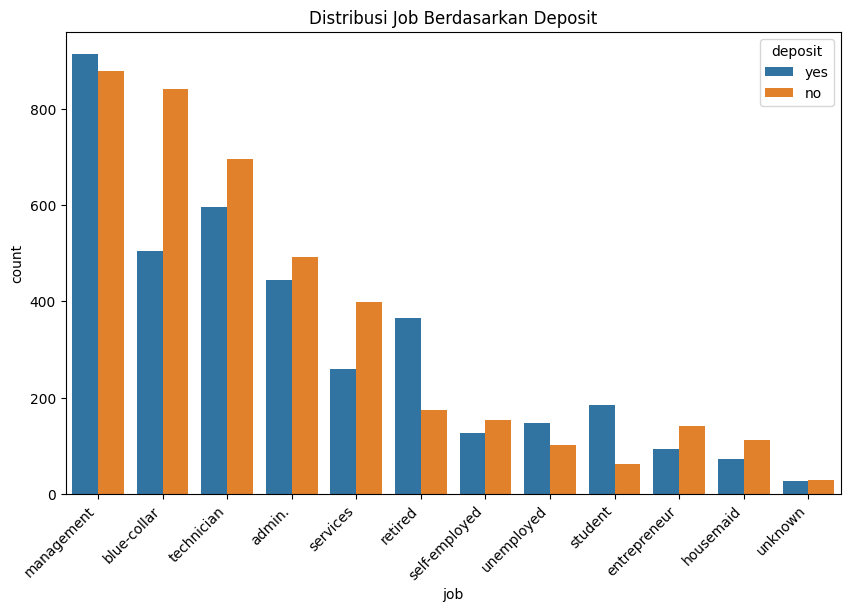

deposit         no  yes  total
job                           
management     878  914   1792
blue-collar    842  504   1346
technician     696  595   1291
admin.         492  444    936
services       398  260    658
retired        175  365    540
self-employed  153  127    280
unemployed     102  147    249
student         63  184    247
entrepreneur   142   94    236
housemaid      112   72    184
unknown         28   26     54


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# oxplot Saldo Berdasarkan Deposit
plt.figure(figsize=(8,6))
sns.boxplot(x='deposit', y='balance', data=df)
plt.title('Distribusi Saldo Berdasarkan Deposit')
plt.show()

# Menampilkan statistik deskriptif untuk balance berdasarkan deposit
print(df.groupby('deposit')['balance'].describe())

# Barplot Pekerjaan Berdasarkan Deposit
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='deposit', data=df, order=df['job'].value_counts().index)
plt.title('Distribusi Job Berdasarkan Deposit')
plt.xticks(rotation=45, ha='right')
plt.show()

# Menampilkan jumlah masing-masing job berdasarkan deposit
job_deposit_counts = df.groupby(['job', 'deposit']).size().unstack().fillna(0)
job_deposit_counts['total'] = job_deposit_counts.sum(axis=1)
job_deposit_counts = job_deposit_counts.sort_values(by='total', ascending=False)
print(job_deposit_counts)

**Kesimpulan:**
* Management dan retired adalah dua pekerjaan yang menunjukkan partisipasi deposito lebih tinggi dibandingkan dengan pekerjaan lainnya.
* Blue-collar, admin, technician, services, dan self-employed menunjukkan partisipasi deposito yang lebih rendah, dengan lebih banyak nasabah yang tidak tertarik untuk membuka deposito.
* Entrepreneur, housemaid, dan unknown adalah kelompok yang memiliki partisipasi deposito paling rendah dan menunjukkan bahwa nasabah dalam pekerjaan ini cenderung tidak tertarik untuk membuka deposito.

**Rekomendasi:**
* Strategi pemasaran produk deposito dapat lebih difokuskan pada management dan retired, karena kelompok ini menunjukkan minat yang lebih tinggi terhadap deposito.
* Untuk kelompok dengan partisipasi lebih rendah seperti blue-collar, entrepreneur, dan housemaid, perlu dilakukan pendekatan yang lebih intens atau berbeda untuk meningkatkan minat terhadap produk deposito.

### 2.6. Correlation ANalysis
Untuk memahami lebih dalam tentang hubungan antar fitur numerik, kita akan melakukan analisis korelasi menggunakan heatmap.
Ini memungkinkan kita untuk melihat apakah ada fitur yang saling berkorelasi yang dapat mempengaruhi model.

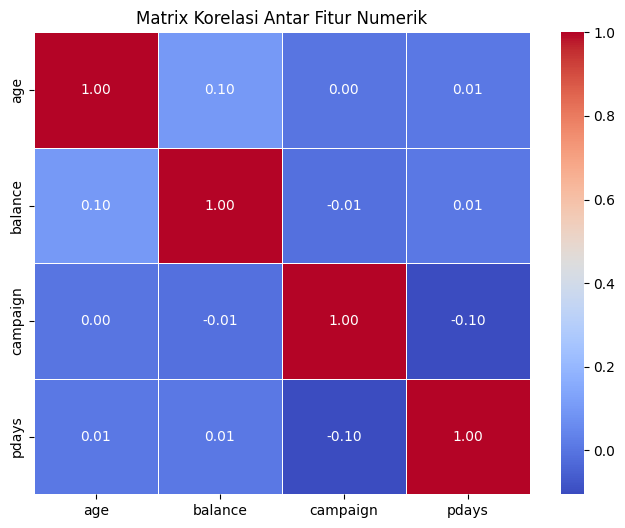

In [11]:
# Korelasi antar fitur numerik
corr = df[['age', 'balance', 'campaign', 'pdays']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrix Korelasi Antar Fitur Numerik')
plt.show()

## 3. Data Preparation
Pada langkah ini, kita akan mempersiapkan data untuk model machine learning. Ini termasuk beberapa tugas penting, seperti mengisi nilai yang hilang, mengonversi fitur kategorikal menjadi numerik, dan melakukan scaling pada fitur numerik yang sensitif terhadap skala. Berikut adalah langkah-langkah yang akan dilakukan:
1. Handling Missing Values (berdasarkan analisa sebelumnya tidak ada missing value)
2. Handling Outliers
3. Feature Engineering: Buat fitur baru yang dapat membantu model. Misalnya, menggabungkan beberapa kolom menjadi satu, atau menghitung rasio antara dua fitur numerik.
4. Encoding categorical Features:
Fitur-fitur kategorikal seperti job, loan, housing, dll., akan diubah menjadi format numerik yang bisa dimengerti oleh model machine learning.
5. Feature Scaling:
Logistic Regression memerlukan data yang sudah di-scaled agar model bekerja dengan baik, sementara Decision Tree tidak membutuhkan scaling, namun kita tetap akan menyiapkan data tersebut.
6. Split Dataset:
Membagi data menjadi training set dan test set. Ini akan memisahkan data yang digunakan untuk melatih model dan data yang digunakan untuk menguji hasilnya.

### 3.1. Handling Outliers
Untuk fitur seperti balance dan pdays, kita akan menggunakan **Winsorizing** untuk menggantikan nilai ekstrem dengan batas yang lebih moderat. Hal ini mengurangi pengaruh outliers yang ekstrem tanpa menghapus data.

In [12]:
from scipy.stats import mstats

# Menerapkan Winsorizing pada 'balance' dan 'pdays'
df['balance'] = mstats.winsorize(df['balance'], limits=[0.05, 0.05])
df['pdays'] = mstats.winsorize(df['pdays'], limits=[0.05, 0.05])

# Verifikasi hasil Winsorizing
df[['balance', 'pdays']].describe()

,balance,pdays
count,7813.000000,7813.000000
mean,1262.820939,47.933572
std,1673.585509,95.426526
min,-56.000000,-1.000000
25%,127.000000,-1.000000
50%,549.000000,-1.000000
75%,1684.000000,40.000000
max,6138.000000,323.000000


1. Balance:
* Setelah dilakukan Winsorizing, distribusi saldo nasabah menjadi lebih terkendali, dengan saldo yang jauh lebih moderat dan tidak terpengaruh oleh nilai ekstrem.
* Outliers pada balance telah digantikan dengan batas yang lebih moderat, yang membuat data lebih stabil dan lebih mudah dikelola oleh model.
2.	Pdays:
* Nilai pdays juga telah dikendalikan dengan Winsorizing. Dengan banyaknya nilai 0 yang menunjukkan nasabah yang belum dihubungi, distribusi waktu yang terlewati sejak dihubungi sekarang lebih konsisten.
* Outliers pada pdays (nilai yang sangat tinggi) telah dipangkas, memberikan model data yang lebih stabil.

### 3.2 RobustScaler
Karena beberapa fitur memiliki nilai ekstrem dan rentang yang berbeda, kita menggunakan RobustScaler untuk menormalkan data. RobustScaler lebih tahan terhadap outliers, yang menjadikannya lebih cocok untuk dataset ini.

In [13]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi dan terapkan RobustScaler
scaler = RobustScaler()
num_cols = ['age', 'balance', 'campaign', 'pdays']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verifikasi hasil scaling
df[num_cols].describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,0.132780,0.458459,0.259887,1.193502
std,0.701159,1.074878,1.363500,2.327476
min,-1.235294,-0.388568,-0.500000,0.000000
25%,-0.411765,-0.271034,-0.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.588235,0.728966,0.500000,1.000000
max,3.294118,3.589595,30.500000,7.902439


**Kesimpulan:**
* Distribusi Data yang Lebih Stabil: Setelah dilakukan RobustScaler, distribusi dari fitur-fitur seperti age, balance, campaign, dan pdays menjadi lebih stabil dan berada dalam rentang yang seragam.
* Outliers Terkendali: Dengan menggunakan Winsorizing pada balance dan pdays, data ekstrem telah diganti dengan batas yang lebih moderat, menjadikan data lebih aman untuk diproses oleh model machine learning.
* Persiapan Model: Data sekarang sudah lebih siap untuk tahap modeling, dengan fitur-fitur yang sudah distabilkan dan tidak lagi terpengaruh oleh outliers.

### 3.3 Encoding Categorical Features
Kita akan menggunakan One-Hot Encoding untuk mengubah kolom-kolom kategorikal menjadi format numerik. Misalnya, kolom seperti job dan loan akan diubah menjadi beberapa kolom baru, masing-masing mewakili kategori yang berbeda.

In [14]:
# Mengubah target 'deposit' menjadi 1 untuk 'yes' dan 0 untuk 'no'
df['deposit'] = df['deposit'].astype(str).str.strip().str.lower()
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# One-hot encoding untuk kolom kategorikal lainnya
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first untuk menghindari dummy variable trap

# Menampilkan data setelah encoding
df_encoded.head()

,age,balance,campaign,pdays,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.941176,0.714836,0.0,0.000000,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0.000000,-0.388568,0.5,0.000000,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.705882,1.590238,-0.5,7.902439,1,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,-0.058824,-0.388568,-0.5,0.000000,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,-0.176471,-0.220938,1.0,0.000000,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


Setelah melakukan One-Hot Encoding pada fitur kategorikal, berikut adalah beberapa penjelasan tentang perubahan yang terjadi pada dataset:
1. Kolom Baru yang Dibuat:
	* Kolom kategorikal seperti job, month, dan poutcome telah diubah menjadi beberapa kolom baru untuk setiap kategori, misalnya:
	*	job_blue-collar, job_entrepreneur, job_housemaid, dll. untuk kolom job.
	*	month_jul, month_jun, month_mar, dll. untuk kolom month.
	*	poutcome_other, poutcome_success, poutcome_unknown untuk kolom poutcome.	
2.	Target Variable (deposit):
	*	Kolom deposit telah diubah menjadi 1 (yes) dan 0 (no), yang merupakan format yang lebih cocok untuk klasifikasi biner, dan memudahkan pelatihan model.
3.	Perubahan Nilai dalam Kolom Baru:
	*	Kolom-kolom seperti job_blue-collar, job_entrepreneur, dan seterusnya berisi nilai True atau False. Nilai True menunjukkan bahwa seorang nasabah memiliki pekerjaan yang sesuai dengan kategori tersebut, dan False berarti tidak.
	*	Contoh: Pada baris pertama, nilai job_entrepreneur adalah False, yang berarti nasabah di baris tersebut tidak bekerja sebagai pengusaha.
4.	Jumlah Kolom:
	*	Sebelumnya dataset memiliki 11 kolom. Setelah melakukan One-Hot Encoding, dataset memiliki 34 kolom.
	*	Setiap kategori dalam kolom kategorikal yang sebelumnya memiliki nilai seperti admin, technician, entrepreneur, dll., sekarang memiliki kolom terpisah untuk setiap kategori (contoh: job_blue-collar, job_entrepreneur, dst.).

### 3.4 Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi fitur (X) dan target (y)
X = df_encoded.drop('deposit', axis=1)  # Semua kolom selain target
y = df_encoded['deposit']  # Kolom target 'deposit'

# Split data menjadi training dan testing set (80% untuk training, 20% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 6250 samples
Test set: 1563 samples


## 5. Model Training & Evaluation

Setelah proses data preparation selesai, pada tahap ini, kita melakukan benchmarking awal untuk membandingkan performa beberapa model machine learning yang akan kita gunakan dalam kasus ini.

Model yang akan digunakan:
* Logistic Regression
Dipilih karena merupakan model dasar yang mudah diinterpretasikan dan sering digunakan untuk masalah klasifikasi biner. Logistic Regression juga memberikan informasi mengenai koefisien fitur yang bisa digunakan untuk memahami faktor-faktor yang mempengaruhi keputusan nasabah.
* Decision Tree
Dipilih karena mudah divisualisasikan dan mampu menangkap hubungan non-linear antara fitur dan target. Namun, Decision Tree memiliki kecenderungan overfitting jika tidak dilakukan pruning atau tuning.
* Random Forest
Merupakan ensemble dari Decision Tree yang lebih stabil dan mampu mengurangi overfitting. Random Forest juga memberikan feature importance yang membantu dalam seleksi fitur.
* Voting Classifier (Soft Voting)
Voting Classifier adalah ensemble yang menggabungkan prediksi dari Logistic Regression dan Random Forest.
Ini dipilih untuk memanfaatkan kekuatan masing-masing model agar prediksi menjadi lebih robust.

Kami menggunakan Stratified K-Fold Cross Validation (K=5) karena:
* Dataset ini memiliki distribusi target yang sedikit imbalance antara “yes” dan “no”.
* Stratified K-Fold memastikan proporsi target tetap seimbang di setiap fold, sehingga hasil evaluasi lebih representatif dan tidak bias.

**Metrik yang Digunakan**

Kami memilih beberapa metrik evaluasi utama:
* ROC AUC (Receiver Operating Characteristic - Area Under Curve)
Digunakan untuk mengukur kemampuan model membedakan antara kelas positif dan negatif secara menyeluruh, independen dari threshold. Cocok digunakan ketika dataset memiliki sedikit imbalance.
* Accuracy
Mengukur seberapa banyak prediksi yang benar dibandingkan keseluruhan data. Namun, accuracy bisa menyesatkan jika data imbalance, sehingga perlu dibandingkan dengan metrik lain.
* Recall (True Positive Rate)
Sangat penting untuk kasus ini, karena kita ingin meminimalkan jumlah nasabah potensial yang terlewat untuk ditawari deposito. Semakin tinggi recall, semakin banyak nasabah yang benar-benar tertarik untuk deposito berhasil terdeteksi oleh model.

### 5.1. Model Benchmarking

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import numpy as np
import pandas as pd

# Definisikan model
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(solver='liblinear', random_state=42)),
            ('rf', RandomForestClassifier(random_state=42))
        ],
        voting='soft'
    )
}

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    
    results.append({
        'Model': name,
        'ROC AUC Mean': np.mean(auc_scores),
        'ROC AUC Std': np.std(auc_scores),
        'Accuracy Mean': np.mean(acc_scores),
        'Accuracy Std': np.std(acc_scores),
        'Recall Mean': np.mean(recall_scores),
        'Recall Std': np.std(recall_scores)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='ROC AUC Mean', ascending=False).reset_index(drop=True)

df_results

,Model,ROC AUC Mean,ROC AUC Std,Accuracy Mean,Accuracy Std,Recall Mean,Recall Std
0,Voting Classifier,0.773664,0.009073,0.7128,0.010257,0.617420,0.024218
1,Logistic Regression,0.758683,0.010951,0.7072,0.012090,0.588610,0.026939
2,Random Forest,0.758425,0.009186,0.7040,0.012720,0.643216,0.025798
3,Decision Tree,0.620818,0.012650,0.6216,0.012690,0.604690,0.014641


**Penjelasan:**
* Voting Classifier (Ensemble Logistic Regression & Random Forest)
Memiliki ROC AUC tertinggi (0.7737) dan akurasi tertinggi (71%).
Namun, recall-nya (61.7%) lebih rendah dibanding Random Forest.
* Random Forest
Recall tertinggi (64.3%), artinya model ini lebih banyak menangkap nasabah yang benar-benar melakukan deposito.
Namun, AUC dan akurasi sedikit di bawah Voting Classifier.
* Logistic Regression
Performanya cukup baik di ROC AUC (0.7587) dan akurasi (70.7%),
tetapi recall rendah (58.8%), artinya banyak positif class yang luput.
* Decision Tree
Memiliki performa paling rendah di semua metrik, dengan ROC AUC 0.6208 dan akurasi 62.1%.
Model ini terlalu sederhana sehingga berpotensi overfitting ke data training.

**Kesimpulan Benchmarking Awal:**
* Voting Classifier unggul di ROC AUC dan akurasi, namun Random Forest lebih baik dalam recall.
* Jika tujuan utama adalah menangkap sebanyak mungkin nasabah yang akan berdeposito (recall lebih penting), maka Random Forest menjadi kandidat kuat.
* Jika tujuan adalah keseimbangan antara deteksi positif dan prediksi keseluruhan, Voting Classifier bisa dipertimbangkan.

### 5.2. Oversampling test with SMOT
Pada dataset ini terdapat sedikit ketidakseimbangan antara kelas deposit = yes dan deposit = no.
Untuk mengatasi ketidakseimbangan ini, kita akan menggunakan teknik SMOTE (Synthetic Minority Oversampling Technique).

Mengapa SMOTE?
* SMOTE membantu menciptakan data sintetis untuk kelas minoritas.
* Dengan SMOTE, kita berharap model akan lebih mampu mengenali nasabah yang benar-benar membuka deposito.
* Fokus utama oversampling adalah meningkatkan Recall, yaitu kemampuan model untuk menangkap kelas positif.

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, recall_score

# SMOTE setup
smote = SMOTE(random_state=42)

# Definisi pipeline model dengan SMOTE
def build_pipeline(model):
    return Pipeline([
        ('smote', smote),
        ('classifier', model)
    ])

# Ulangi model yang digunakan
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft')
}

# StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model dengan oversampling
results_smote = []

for name, model in models.items():
    pipeline = build_pipeline(model)
    auc_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
    acc_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
    
    results_smote.append({
        'Model': name,
        'ROC AUC Mean': np.mean(auc_scores),
        'ROC AUC Std': np.std(auc_scores),
        'Accuracy Mean': np.mean(acc_scores),
        'Accuracy Std': np.std(acc_scores),
        'Recall Mean': np.mean(recall_scores),
        'Recall Std': np.std(recall_scores)
    })

df_results_smote = pd.DataFrame(results_smote)
df_results_smote.sort_values(by='ROC AUC Mean', ascending=False, inplace=True)

df_results_smote

,Model,ROC AUC Mean,ROC AUC Std,Accuracy Mean,Accuracy Std,Recall Mean,Recall Std
0,Logistic Regression,0.759435,0.011000,0.69824,0.009579,0.638191,0.019904
2,Random Forest,0.757289,0.009876,0.70848,0.009648,0.663652,0.018933
3,Voting Classifier,0.738717,0.005329,0.65040,0.006480,0.648241,0.019620
1,Decision Tree,0.622555,0.011944,0.62240,0.011659,0.623786,0.022736


**Kesimpulan Sementara:**
* Random Forest dengan SMOTE memberikan kombinasi terbaik dari akurasi dan recall, serta mempertahankan ROC AUC yang tinggi.
* Logistic Regression stabil, dengan ROC AUC baik, namun recall lebih rendah dibanding Random Forest.
* Voting Classifier memiliki recall baik, tetapi akurasinya lebih rendah sehingga mungkin overfitting pada kelas tertentu.
* Decision Tree performanya paling rendah, sesuai ekspektasi untuk model sederhana.

**Rekomendasi:**
* Jika prioritas bisnis adalah mengurangi false negative (menangkap sebanyak mungkin calon pembeli deposito), Random Forest adalah pilihan terbaik saat ini.
* Jika ingin model lebih interpretable, Logistic Regression bisa dipertimbangkan.
* Model seperti Voting Classifier atau Decision Tree mungkin kurang optimal untuk data ini.

### 5.3. Hyperparameter Tuning
Setelah melakukan model benchmarking dan handling imbalance, langkah berikutnya adalah melakukan Hyperparameter Tuning untuk meningkatkan performa model dengan mencari kombinasi parameter terbaik. Tuning dilakukan agar model bekerja lebih optimal untuk problem spesifik kita.

**Hyperparameter tuning berfungsi untuk:**
* Mengoptimalkan model agar performanya lebih baik di data baru.
* Mengurangi risiko overfitting atau underfitting.
* Memastikan model yang kita gunakan benar-benar sesuai dengan pola data.

**Kenapa Penting?**
* Random Forest memiliki banyak parameter seperti n_estimators, max_depth, min_samples_split, dll.
* Logistic Regression juga memiliki parameter seperti C (regularisasi), penalty, dan solver.

**Strategi yang Digunakan**
* Randomized Search CV
Kita menggunakan RandomizedSearchCV, yaitu strategi pencarian parameter secara acak dari kumpulan parameter yang telah ditentukan.
Keunggulannya dibandingkan Grid Search adalah lebih hemat waktu karena tidak perlu mencoba semua kombinasi parameter secara exhaustif, tetapi tetap efektif menemukan parameter yang baik.
* K-Fold Cross Validation (CV = 5)
Setiap kombinasi parameter dievaluasi menggunakan 5-fold cross validation, sehingga hasil tuning lebih robust dan mengurangi risiko overfitting terhadap data training.

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# ========================
# Random Forest Tuning
# ========================

# Parameter grid Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)

print("=== Random Forest Best Parameters ===")
print(random_search_rf.best_params_)
print("Best ROC AUC Random Forest:", random_search_rf.best_score_)

# ===========================
# Logistic Regression Tuning
# ===========================

# Parameter grid Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']        # Solver yang mendukung l1 & l2
}

lr = LogisticRegression(random_state=42)

random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid_lr,
    n_iter=10,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

random_search_lr.fit(X_train, y_train)

print("\n=== Logistic Regression Best Parameters ===")
print(random_search_lr.best_params_)
print("Best ROC AUC Logistic Regression:", random_search_lr.best_score_)

=== Random Forest Best Parameters ===
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
Best ROC AUC Random Forest: 0.7746011835594512

=== Logistic Regression Best Parameters ===
{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best ROC AUC Logistic Regression: 0.7602461003332127


**Kesimpulan Sementara:**
* Random Forest: Lebih unggul dari sisi performa klasifikasi dan cocok untuk prediksi yang mengutamakan akurasi.
* Logistic Regression: Performa sedikit di bawah RF, tetapi lebih mudah diinterpretasikan untuk memahami faktor-faktor utama yang mempengaruhi keputusan nasabah.

Langkah berikutnya adalah melakukan feature selection dan evaluasi final di test set menggunakan model dengan parameter terbaik ini.

### 5.4. Feature Importance & Selection

Pada langkah ini, kita melakukan feature importance analysis menggunakan model Random Forest Classifier yang telah dituning di langkah sebelumnya.
Tujuan dari proses ini adalah untuk mengetahui fitur mana yang paling berpengaruh terhadap keputusan model dalam memprediksi apakah nasabah akan membuka deposito atau tidak.

Mengapa ini penting?
* Dengan mengetahui fitur yang paling berpengaruh, kita bisa melakukan feature selection untuk menyederhanakan model, mengurangi kompleksitas, dan meningkatkan interpretabilitas bagi stakeholder.
* Selain itu, informasi ini juga bisa digunakan oleh tim bisnis untuk membantu pengambilan keputusan, seperti menentukan variabel apa saja yang perlu difokuskan dalam strategi marketing atau komunikasi kepada calon nasabah.

,Feature,Importance
1,balance,0.140822
0,age,0.135637
18,contact_unknown,0.100385
31,poutcome_success,0.097775
3,pdays,0.077403
2,campaign,0.062698
15,housing_yes,0.059237
32,poutcome_unknown,0.038295
26,month_may,0.029813
16,loan_yes,0.027335


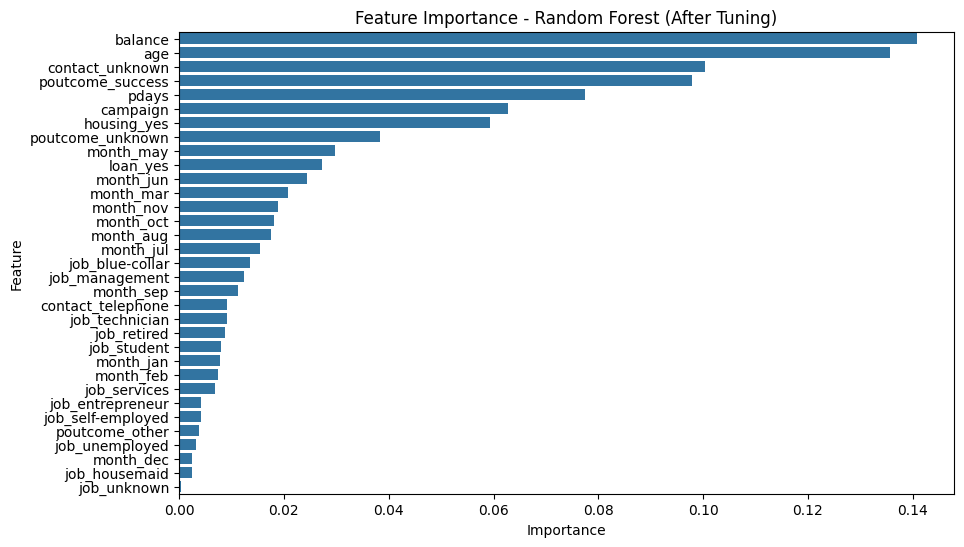

Selected Features: ['balance', 'age', 'contact_unknown', 'poutcome_success', 'pdays', 'campaign', 'housing_yes', 'poutcome_unknown', 'month_may', 'loan_yes', 'month_jun', 'month_mar']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Gunakan best parameters dari RandomizedSearchCV
rf_best = RandomForestClassifier(**random_search_rf.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

# Buat dataframe untuk feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_best.feature_importances_
})

# Urutkan dari yang paling penting
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Tampilkan tabel
display(feature_importances)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance - Random Forest (After Tuning)')
plt.show()

# Pilih fitur Terpilih
selected_features = feature_importances[feature_importances['Importance'] > 0.02]['Feature'].tolist()
print("Selected Features:", selected_features)

# Subgset data
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

**Insight dari Feature Importance:**
* Balance dan Age menjadi dua faktor utama yang paling menentukan, dengan total kontribusi lebih dari 27% terhadap keputusan model. Ini artinya nasabah dengan saldo lebih tinggi atau usia tertentu memiliki kecenderungan berbeda dalam mengambil produk deposito.
* Status kontak (contact_unknown) dan hasil campaign sebelumnya (poutcome_success) juga memiliki pengaruh besar. Hal ini menunjukkan bahwa histori interaksi dengan nasabah mempengaruhi keberhasilan penawaran deposito.
* Jumlah kontak selama campaign (campaign) dan apakah nasabah memiliki pinjaman rumah atau tidak (housing_yes) juga cukup berpengaruh.
* Variabel waktu (bulan promosi) seperti May, June, dan March muncul sebagai fitur penting, tetapi bukan yang utama.

**Kesimpulan:**

Berdasarkan hasil ini, kita akan memilih fitur-fitur dengan importance di atas 0.02 untuk membangun model yang lebih sederhana namun tetap efektif.
Langkah selanjutnya adalah membangun model akhir hanya dengan fitur-fitur terpilih tersebut dan mengevaluasi performanya di test set.

In [20]:
# Menentukan threshold importance
threshold = 0.02

# Pilih fitur dengan importance di atas threshold
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].tolist()

# Cetak daftar fitur terpilih
print("Fitur yang dipilih untuk model akhir (importance > 0.02):")
for idx, feature in enumerate(selected_features, 1):
    print(f"{idx}. {feature}")

Fitur yang dipilih untuk model akhir (importance > 0.02):
1. balance
2. age
3. contact_unknown
4. poutcome_success
5. pdays
6. campaign
7. housing_yes
8. poutcome_unknown
9. month_may
10. loan_yes
11. month_jun
12. month_mar


### 5.5. Final Model Evaluation & Comparison

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#  Random Forest Evaluation 
print("\n=== Random Forest Final Model Evaluation ===")
rf_final = RandomForestClassifier(**random_search_rf.best_params_, random_state=42)
rf_final.fit(X_train_selected, y_train)

y_pred_rf = rf_final.predict(X_test_selected)

print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_final.predict_proba(X_test_selected)[:,1]))

# Logistic Regression Evaluation
print("\n=== Logistic Regression Final Model Evaluation ===")
lr_final = LogisticRegression(**random_search_lr.best_params_, random_state=42)
lr_final.fit(X_train_selected, y_train)

y_pred_lr = lr_final.predict(X_test_selected)

print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr_final.predict_proba(X_test_selected)[:,1]))


=== Random Forest Final Model Evaluation ===
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       816
           1       0.73      0.62      0.67       747

    accuracy                           0.71      1563
   macro avg       0.71      0.70      0.70      1563
weighted avg       0.71      0.71      0.71      1563

Accuracy: 0.7076135636596289
ROC AUC: 0.7652292175236896

=== Logistic Regression Final Model Evaluation ===
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       816
           1       0.71      0.65      0.68       747

    accuracy                           0.70      1563
   macro avg       0.71      0.70      0.70      1563
weighted avg       0.70      0.70      0.70      1563

Accuracy: 0.7044145873320538
ROC AUC: 0.7660749205974224


Interpretasi dan Rekomendasi:
* Logistic Regression memiliki recall yang lebih tinggi (0.65) dibandingkan Random Forest (0.62). Ini berarti Logistic Regression lebih baik dalam mendeteksi nasabah yang potensial membuka deposito.
* Di sisi lain, Random Forest memang memiliki akurasi sedikit lebih tinggi, namun karena fokus kita adalah mengurangi kehilangan calon nasabah yang potensial, recall lebih menjadi prioritas.
* ROC AUC keduanya relatif mirip (Logistic Regression = 0.766, Random Forest = 0.765), sehingga perbedaan utamanya memang terletak pada kemampuan mendeteksi kelas 1.

### 5.6. Business Recommendation
Sebagai tim data, Kita merekomendasikan menggunakan Logistic Regression sebagai model final.

Alasannya:
* Lebih baik dalam mengidentifikasi nasabah yang bersedia membuka deposito (recall lebih tinggi).
* Model yang lebih sederhana dan mudah diinterpretasikan oleh tim bisnis.
* Walaupun akurasi sedikit lebih rendah, keuntungan bisnis jauh lebih besar jika lebih banyak calon nasabah yang benar-benar tertarik berhasil diidentifikasi, dibandingkan hanya sekadar meminimalkan kesalahan prediksi secara keseluruhan.

## 6. Model Deployment & Saving
Sebagai langkah akhir, kami akan menyimpan model Logistic Regression hasil tuning dan feature selection ini dalam format .pkl menggunakan pickle, agar bisa digunakan kembali untuk prediksi di masa depan, baik untuk batch scoring maupun real-time deployment di pipeline produksi.

In [24]:
import pickle

# Simpan model Logistic Regression ke file pickle
with open('final_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_final, file)

print("Model Logistic Regression berhasil disimpan sebagai 'final_logistic_regression_model.pkl'")

Model Logistic Regression berhasil disimpan sebagai 'final_logistic_regression_model.pkl'
